In [1]:
import torch                                                                # importing pytorch 
from torch import nn                                                        # importing the nn class from the torch 
import numpy as np                                                          # numpy is the mathematical library for python 
import pandas as pd                                                         # for data preprocessing
import matplotlib.pyplot as plt                                             # Data Visualisation Library for python 
# import seaborn as sns                                                       # datavisualisation lib
import torchvision.transforms as transforms                                 # contains various transforms to apply to the dataset 
from torchvision.datasets import MNIST                                      # importing the Mnist dataset from the torchvision library
import sklearn                                                              # ML assistance 
from sklearn.model_selection import train_test_split                        # function for spliting the data into train, val and test sets
from torchvision.transforms import ToTensor                                 # function used for converting the images into tensors 
from torch.utils.data import DataLoader                                     # to make the dataset an python iterable 

In [2]:
import os 
def walk_through_dir(file_path):
    for dirpath, dirnames, filenames in os.walk(file_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [3]:
dataset_path = "/home/tarun/PycharmProjects/pytorch/project1/archive"
walk_through_dir(dataset_path)

there are 2 directories and 0 images in /home/tarun/PycharmProjects/pytorch/project1/archive.
there are 2 directories and 0 images in /home/tarun/PycharmProjects/pytorch/project1/archive/training_set.
there are 0 directories and 4006 images in /home/tarun/PycharmProjects/pytorch/project1/archive/training_set/dogs.
there are 0 directories and 4001 images in /home/tarun/PycharmProjects/pytorch/project1/archive/training_set/cats.
there are 2 directories and 0 images in /home/tarun/PycharmProjects/pytorch/project1/archive/test_set.
there are 0 directories and 1013 images in /home/tarun/PycharmProjects/pytorch/project1/archive/test_set/dogs.
there are 0 directories and 1012 images in /home/tarun/PycharmProjects/pytorch/project1/archive/test_set/cats.


In [4]:


train_dir = os.path.join(dataset_path, "training_set")
test_dir = os.path.join(dataset_path, "test_set")

train_dir, test_dir


('/home/tarun/PycharmProjects/pytorch/project1/archive/training_set',
 '/home/tarun/PycharmProjects/pytorch/project1/archive/test_set')

In [5]:
import cv2
import os

def image_loader(folder_path):
    images = []     # List to store images

    for filename in os.listdir(folder_path):        # Fetching images from multiple files

        file_path = os.path.join(folder_path, filename)         # Fetching from particular file by joining, main_file + current_file

        image = cv2.imread(file_path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
    return images

# folder_path = '/content/drive/MyDrive/Computer Vision/U-Net/LOLdataset/our485/high'
images = image_loader("/home/tarun/PycharmProjects/pytorch/project1/archive/test_set/dogs")


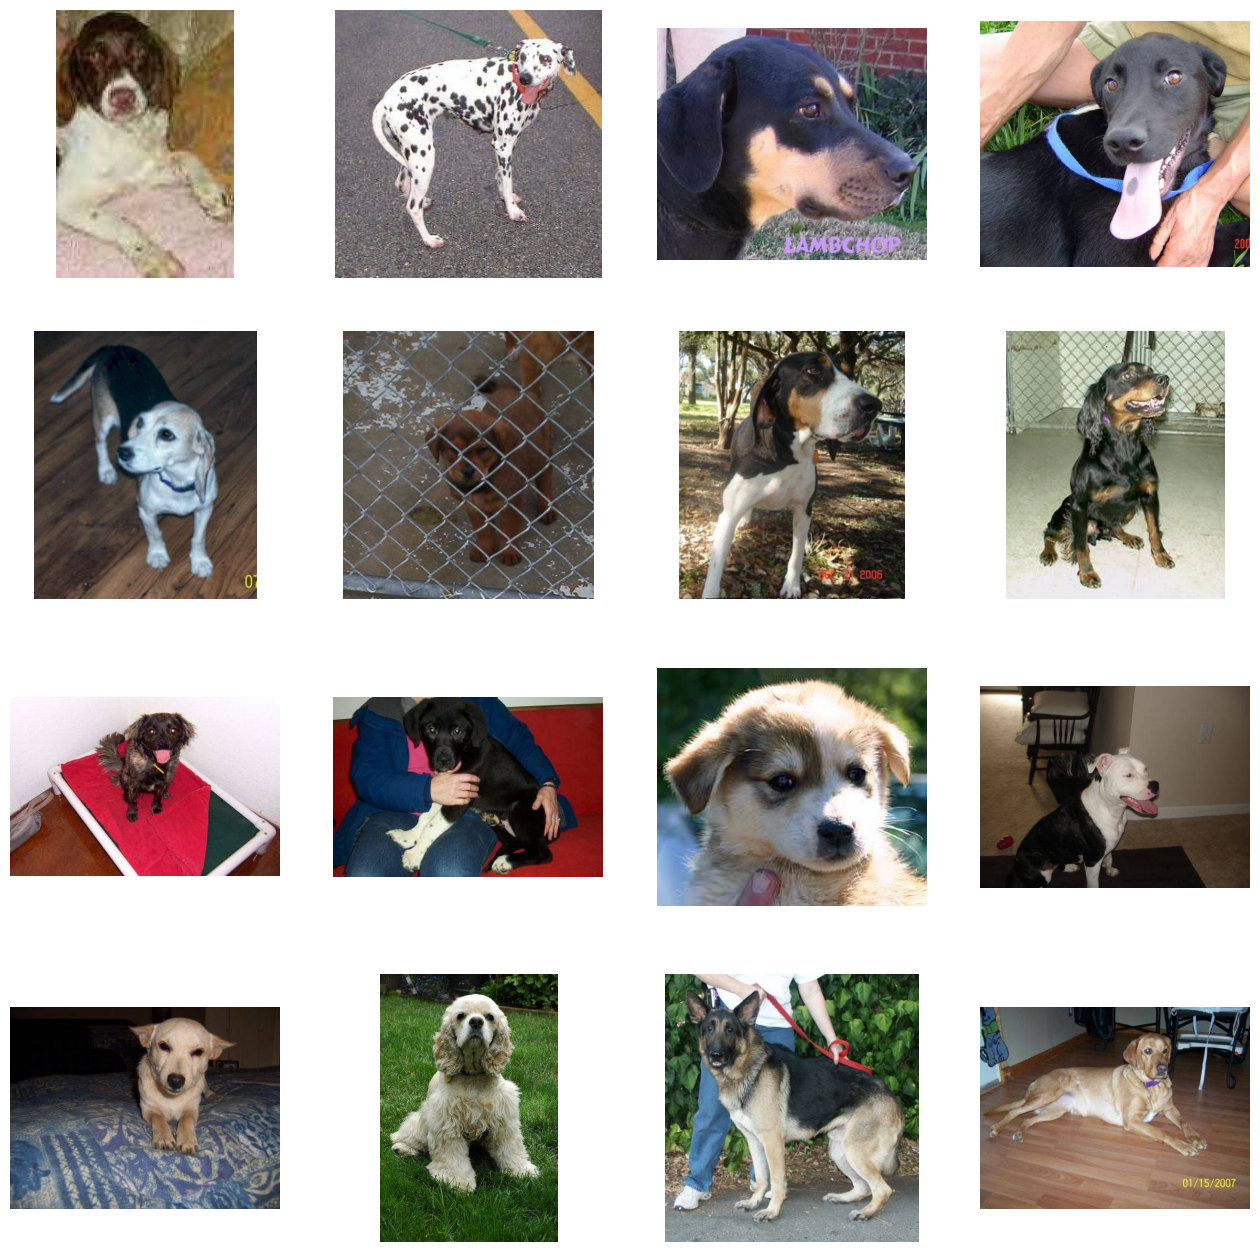

In [6]:
rows, columns = 4,4
fig = plt.figure(figsize=(rows*columns, rows*columns))
for i in range(1, rows*columns+1):
    random_idx = torch.randint(0, len(images), size=[1]).item()
    image= images[random_idx]
    fig.add_subplot(rows,columns,i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis(False)
 

In [7]:
transforms_ = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(size=(28,28)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1),
])

In [8]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform= transforms_,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform=transforms_)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 8005
     Root location: /home/tarun/PycharmProjects/pytorch/project1/archive/training_set
     StandardTransform
 Transform: Compose(
                Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Grayscale(num_output_channels=1)
            ),
 Dataset ImageFolder
     Number of datapoints: 2023
     Root location: /home/tarun/PycharmProjects/pytorch/project1/archive/test_set
     StandardTransform
 Transform: Compose(
                Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Grayscale(num_output_channels=1)
            ))

In [9]:
class_names = train_data.classes

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'cats': 0, 'dogs': 1}

In [11]:
img, label = train_data[0][0], train_data[0][1]
print(f"image tensor: \n {img}")
print(f"image shape: {img.shape}")
print(f"image datatype: {img.dtype}" )
print(f"image label: {label}")
print(f"lagel datatype: {type(label)}")

image tensor: 
 tensor([[[0.1687, 0.1851, 0.1941, 0.1731, 0.1669, 0.2056, 0.2620, 0.2769,
          0.3050, 0.3663, 0.5154, 0.5207, 0.5079, 0.5072, 0.5244, 0.5233,
          0.5039, 0.4920, 0.4790, 0.3888, 0.3637, 0.3469, 0.3463, 0.3457,
          0.3337, 0.3194, 0.3494, 0.5629],
         [0.1581, 0.1761, 0.1894, 0.1802, 0.2003, 0.2307, 0.2880, 0.3269,
          0.3262, 0.3594, 0.4914, 0.4928, 0.4760, 0.4827, 0.4849, 0.4728,
          0.4643, 0.4666, 0.4584, 0.3548, 0.3257, 0.3263, 0.3229, 0.3260,
          0.3273, 0.3197, 0.3292, 0.5625],
         [0.1537, 0.1768, 0.1793, 0.1866, 0.2145, 0.2505, 0.2931, 0.3200,
          0.3121, 0.3621, 0.4629, 0.4648, 0.4609, 0.4611, 0.4568, 0.4517,
          0.4538, 0.4530, 0.4354, 0.3218, 0.3051, 0.3104, 0.3032, 0.3132,
          0.3174, 0.3236, 0.3320, 0.4975],
         [0.1540, 0.1784, 0.1798, 0.2074, 0.2164, 0.2567, 0.2909, 0.2880,
          0.3029, 0.3235, 0.4473, 0.4504, 0.4515, 0.4472, 0.4444, 0.4432,
          0.4430, 0.4257, 0.4325, 0.3318,

Text(0.5, 1.0, 'cats')

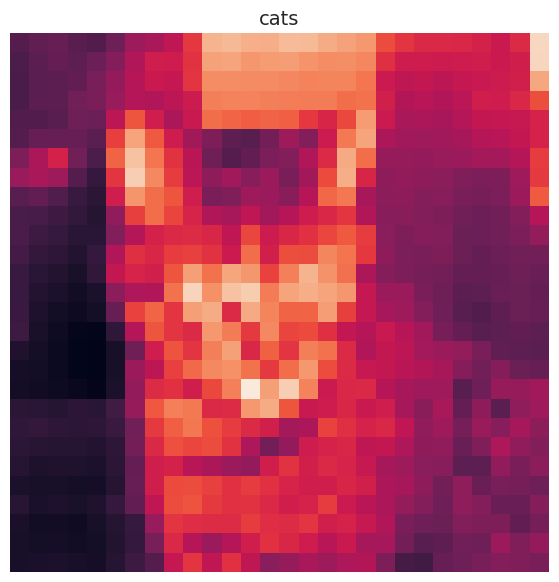

In [12]:
img_permute = img.permute(1,2,0)

plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

In [13]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset = test_data, num_workers=1, shuffle=True)

In [14]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(train_dir))])
print(f"Class names found: {class_names_found}")

Target directory: /home/tarun/PycharmProjects/pytorch/project1/archive/training_set
Class names found: ['cats', 'dogs']


In [15]:
from typing import Tuple, List, Dict

# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:

    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [16]:
find_classes(train_dir)

(['cats', 'dogs'], {'cats': 0, 'dogs': 1})

In [17]:
from torch.utils.data import Dataset
from PIL import Image
class CatDogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.classes = ['cats', 'dogs']
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

        for cls in self.classes:
            cls_dir = os.path.join(root_dir, cls)
            for img_name in os.listdir(cls_dir):
                if img_name.endswith('.jpg'):
                    img_path = os.path.join(cls_dir, img_name)
                    self.image_paths.append(img_path)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')  
        label = self.class_to_idx[os.path.basename(os.path.dirname(img_path))]

        if self.transform:
            image = self.transform(image)

        return image, label


In [18]:
train_data_custom = CatDogDataset(root_dir=train_dir, 
                                      transform=transforms_)
test_data_custom = CatDogDataset(root_dir=test_dir, 
                                     transform=transforms_)
train_data_custom, test_data_custom

(<__main__.CatDogDataset at 0x7f7270fdfe80>,
 <__main__.CatDogDataset at 0x7f726d1b2230>)

In [19]:
len(train_data_custom), len(test_data_custom)

(8005, 2023)

In [20]:
train_data_custom.class_to_idx

{'cats': 0, 'dogs': 1}

In [21]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=True) 

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f726ca6a8c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f726ca6ba30>)

In [22]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom, label_custom

(tensor([[[[0.5767, 0.5677, 0.5601, 0.5797, 0.5758, 0.5719, 0.5802, 0.5723,
            0.5265, 0.3038, 0.3667, 0.2526, 0.2024, 0.4418, 0.5689, 0.5779,
            0.5737, 0.5698, 0.5647, 0.5709, 0.5675, 0.5670, 0.5684, 0.5696,
            0.5617, 0.5633, 0.5574, 0.5495],
           [0.5721, 0.5721, 0.5525, 0.5633, 0.5703, 0.5769, 0.5744, 0.5739,
            0.5304, 0.3111, 0.3577, 0.2475, 0.1616, 0.4123, 0.5629, 0.5707,
            0.5709, 0.5686, 0.5666, 0.5689, 0.5684, 0.5661, 0.5742, 0.5652,
            0.5523, 0.5456, 0.5504, 0.5363],
           [0.5732, 0.5622, 0.5614, 0.5748, 0.5700, 0.5735, 0.5695, 0.5617,
            0.5311, 0.3111, 0.3259, 0.2404, 0.2593, 0.4785, 0.5629, 0.5664,
            0.5617, 0.5691, 0.5703, 0.5698, 0.5707, 0.5723, 0.5680, 0.5029,
            0.3001, 0.2173, 0.2828, 0.3809],
           [0.5557, 0.5569, 0.5640, 0.5684, 0.5785, 0.5613, 0.5664, 0.5712,
            0.5412, 0.3063, 0.2501, 0.2116, 0.2616, 0.4707, 0.5730, 0.5608,
            0.5613, 0.5730, 0

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [24]:
class MNISTv0(nn.Module):                                    # inhereting the parent class nn.module for our models, will do this in every model for pytorch
    def __init__(self, input_shape:int, 
                 output_shape:int):
        """
        initializes FashionMNIST model 
        
        args:
            input_shape (int): shape of input images
            output_shape (int): shape of output images
        """
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(in_features=input_shape, out_features=512, bias=True)                           # total number of parameters in this layer = (784+1)*(512) = 401920
        self.layer2 = nn.Linear(in_features=512, out_features=256, bias=True)                                   # total number of parameters in this layer = (512+1)*256 = 131328
        self.layer3 = nn.Linear(in_features=256, out_features=output_shape, bias=True)                          # total number of parameters in this layer = (256+1)*10 = 2570
        self.relu = nn.ReLU()
    
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(self.flatten(x))))))

In [25]:
model_0 = MNISTv0(input_shape=28*28, output_shape=10)
model_0

MNISTv0(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)

In [26]:
model_0.load_state_dict(torch.load('best_model_fcc1.pth'))


<All keys matched successfully>

In [27]:
# model_0.layer1 = nn.Linear(in_features=120*120*3, out_features=512, bias=True)
# model_0.layer1.weight.requires_grad = True
# model_0.layer1.bias.requires_grad = True

In [28]:
# Modify the last layer for the Dog-Cat classifier
model_0.layer3 = nn.Linear(in_features=256, out_features=2, bias=True)
# Make the last layer trainable



In [29]:
# Freeze pretrained layers
for param in model_0.parameters():
    param.requires_grad = False

model_0.layer3.weight.requires_grad = True
model_0.layer3.bias.requires_grad = True

In [30]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    
    model.train()  # Set the model to training mode
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        
        train_loss += loss.item()  # Convert to scalar and accumulate
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))  # Go from logits -> pred labels
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    return train_loss, train_acc

In [31]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0, 0
    
    model.eval()  # Set the model to evaluation mode
    with torch.inference_mode():  # Disable gradient computation
        for X, y in data_loader:
            test_pred = model(X)
            
            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y) # Convert to scalar and accumulate
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))  # Go from logits -> pred labels
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    return test_loss, test_acc

In [32]:
from sklearn.metrics import accuracy_score
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return correct / len(y_true) * 100

In [33]:
torch.manual_seed(42)
from tqdm import tqdm

# Training loop
epochs = 10
best_val_loss = float('inf')

for epoch in tqdm(range(epochs)):
    train_loss, train_accuracy = train_step(model=model_0, data_loader=train_dataloader_custom, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=optimizer, device=device)
        
    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, ')


test_loss, test_accuracy = test_step(data_loader=test_dataloader_custom, model=model_0, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')



 10%|█         | 1/10 [00:28<04:13, 28.13s/it]

Epoch 1/10, Train Loss: 1.6468, Train Accuracy: 49.76%, 


 20%|██        | 2/10 [00:49<03:14, 24.37s/it]

Epoch 2/10, Train Loss: 1.5911, Train Accuracy: 51.94%, 


 30%|███       | 3/10 [01:12<02:44, 23.44s/it]

Epoch 3/10, Train Loss: 1.5867, Train Accuracy: 51.11%, 


 40%|████      | 4/10 [01:36<02:21, 23.61s/it]

Epoch 4/10, Train Loss: 1.6013, Train Accuracy: 50.54%, 


 50%|█████     | 5/10 [01:59<01:57, 23.53s/it]

Epoch 5/10, Train Loss: 1.5787, Train Accuracy: 51.97%, 


 60%|██████    | 6/10 [02:20<01:30, 22.61s/it]

Epoch 6/10, Train Loss: 1.5913, Train Accuracy: 51.42%, 


 70%|███████   | 7/10 [02:41<01:06, 22.03s/it]

Epoch 7/10, Train Loss: 1.5529, Train Accuracy: 52.47%, 


 80%|████████  | 8/10 [03:01<00:43, 21.58s/it]

Epoch 8/10, Train Loss: 1.5431, Train Accuracy: 52.69%, 


 90%|█████████ | 9/10 [03:22<00:21, 21.34s/it]

Epoch 9/10, Train Loss: 1.5840, Train Accuracy: 51.94%, 


100%|██████████| 10/10 [03:43<00:00, 22.34s/it]

Epoch 10/10, Train Loss: 1.5556, Train Accuracy: 52.52%, 


Test Loss: 0.8444, Test Accuracy: 57.04%
